<a href="https://colab.research.google.com/github/ibryegen/Deep_Learning/blob/main/opencv_DNN_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

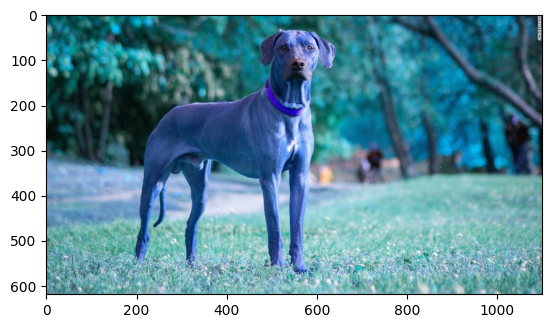

In [31]:
test_img = cv2.imread('test.jpg')

plt.imshow(test_img)
plt.show()

In [32]:
with open("/content/labels.txt", "r") as l:
    names = l.read().split("\n")
#print(names[0])
class_names = [name.split(",")[0] for name in names]
#print(class_names[1])

In [33]:
model = cv2.dnn.readNet(model="/content/DenseNet_121.caffemodel",
                        config = "/content/DenseNet_121.prototxt",
                        framework = "Caffe")

vizsla


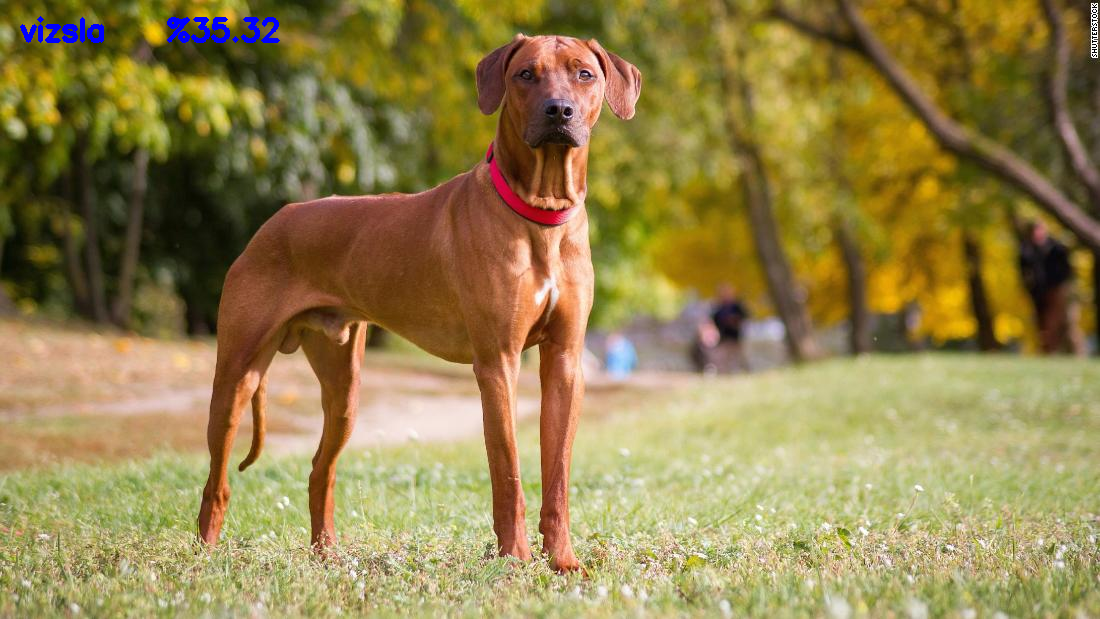

In [34]:
from google.colab.patches import cv2_imshow

blob = cv2.dnn.blobFromImage(image = test_img,
                             scalefactor = 0.01,
                             size = (224, 224),
                             mean = (104, 117, 123))

model.setInput(blob)

outputs = model.forward()
outputs = outputs[0]
outputs = outputs.reshape(1000,1)

label_id = np.argmax(outputs)
class_name = class_names[label_id]
print(class_name)

probability = np.exp(outputs) / np.sum(np.exp(outputs))
probability = np.max(probability) * 100
probability = " %{:.2f}".format(probability)

cv2.putText(test_img, class_name, (20,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 3)
cv2.putText(test_img, probability, (150,40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 3)

cv2_imshow(test_img)
